<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/xornet_batch_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the MLP model with batch normalization and statistics collection
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.fc1 = nn.Linear(2, 8)  # Input layer to first hidden layer
        self.bn1 = nn.BatchNorm1d(8)  # Batch normalization for the first hidden layer
        self.fc2 = nn.Linear(8, 4)  # First hidden layer to second hidden layer
        self.bn2 = nn.BatchNorm1d(4)  # Batch normalization for the second hidden layer
        self.fc3 = nn.Linear(4, 1)  # Second hidden layer to output layer

        # For storing BatchNorm statistics
        self.bn1_input = []
        self.bn1_output = []
        self.bn2_input = []
        self.bn2_output = []

    def forward(self, x):
        x1 = self.fc1(x)
        self.bn1_input.append(x1.detach().numpy())
        x1 = self.bn1(x1)
        self.bn1_output.append(x1.detach().numpy())
        x = torch.relu(x1)

        x2 = self.fc2(x)
        self.bn2_input.append(x2.detach().numpy())
        x2 = self.bn2(x2)
        self.bn2_output.append(x2.detach().numpy())
        x = torch.relu(x2)

        x = self.fc3(x).squeeze(1)
        return x

# Function to plot BatchNorm statistics
def plot_bn_statistics(bn1_inputs, bn1_outputs, bn2_inputs, bn2_outputs):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    axs[0, 0].hist(np.concatenate(bn1_inputs).flatten(), bins=30, alpha=0.7, label='BN1 Inputs')
    axs[0, 1].hist(np.concatenate(bn1_outputs).flatten(), bins=30, alpha=0.7, color='orange', label='BN1 Outputs')
    axs[1, 0].hist(np.concatenate(bn2_inputs).flatten(), bins=30, alpha=0.7, label='BN2 Inputs')
    axs[1, 1].hist(np.concatenate(bn2_outputs).flatten(), bins=30, alpha=0.7, color='orange', label='BN2 Outputs')
    for ax in axs.flat:
        ax.set(xlabel='Value', ylabel='Frequency')
    axs[0, 0].set_title('Histogram of BN1 Inputs')
    axs[0, 1].set_title('Histogram of BN1 Outputs')
    axs[1, 0].set_title('Histogram of BN2 Inputs')
    axs[1, 1].set_title('Histogram of BN2 Outputs')
    plt.tight_layout()
    plt.show()

# Instantiate, train, and test the model as before
model = XORNet()
criterion = nn.BCEWithLogitsLoss()#nn.CrossEntropyLoss() uses two outputs
optimizer = optim.Adam(model.parameters(), lr=0.01)

X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float)
y = torch.tensor([0, 1, 1, 0], dtype=torch.float)#.unsqueeze(1)

for epoch in range(1000):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/1000], Loss: {loss.item():.4f}')

with torch.no_grad():
    predicted = model(X)
    print(f'Predicted classes: {predicted}')
    print(f'Actual classes: {y}')

# Plot the BatchNorm statistics


Epoch [1/1000], Loss: 0.8604
Epoch [101/1000], Loss: 0.3550
Epoch [201/1000], Loss: 0.3487
Epoch [301/1000], Loss: 0.3476
Epoch [401/1000], Loss: 0.3472
Epoch [501/1000], Loss: 0.3470
Epoch [601/1000], Loss: 0.3468
Epoch [701/1000], Loss: 0.3468
Epoch [801/1000], Loss: 0.3467
Epoch [901/1000], Loss: 0.3467
Predicted classes: tensor([ 1.2036e-05,  8.4488e+00,  1.2036e-05, -8.4768e+00])
Actual classes: tensor([0., 1., 1., 0.])


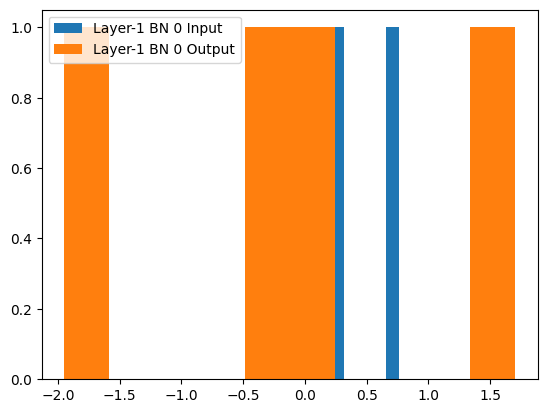

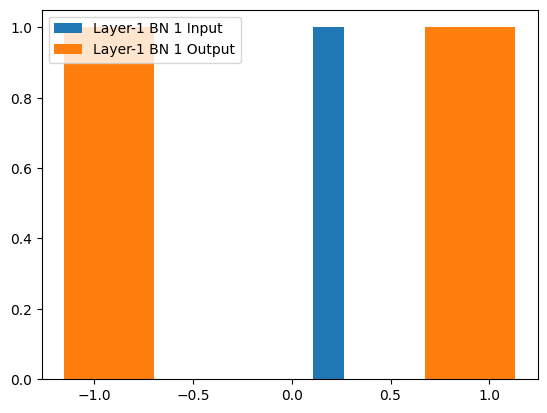

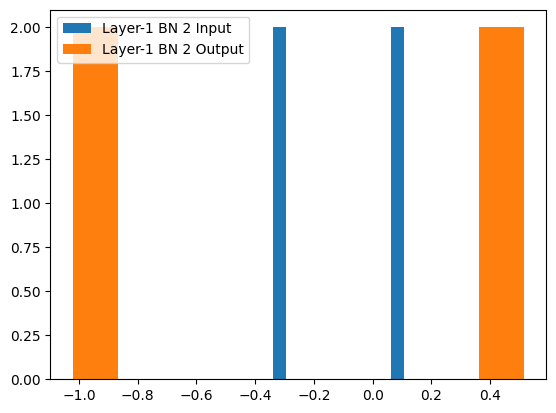

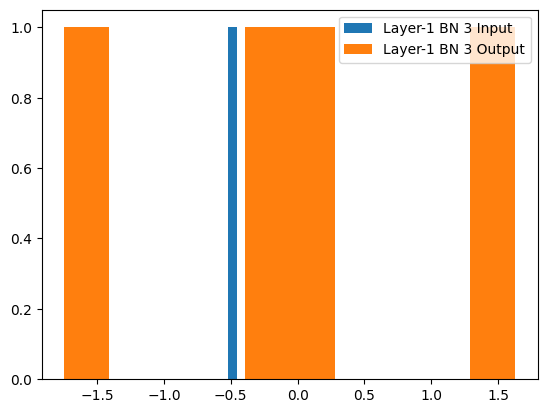

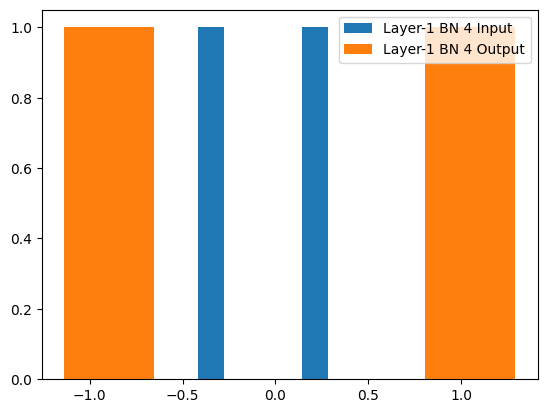

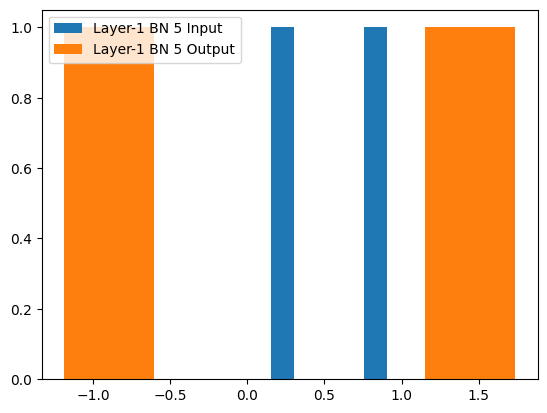

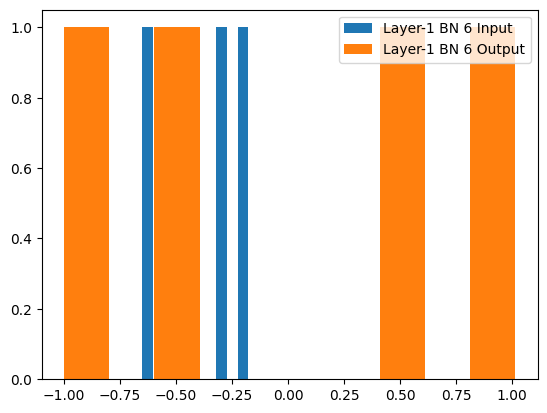

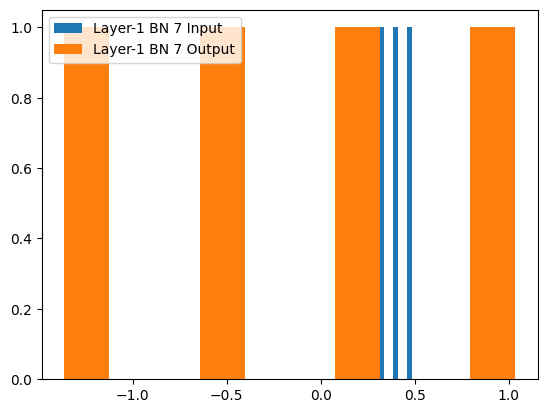

In [2]:
B_out = np.array(model.bn1_output)
B_in = np.array(model.bn1_input)
idx = -1;
for neuron in range(B_in.shape[-1]):
  plt.hist(B_in[idx,:,neuron],label = f'Layer-1 BN {neuron} Input');
  plt.hist(B_out[idx,:,neuron],label = f'Layer-1 BN {neuron} Output');
  plt.legend()
  plt.show()

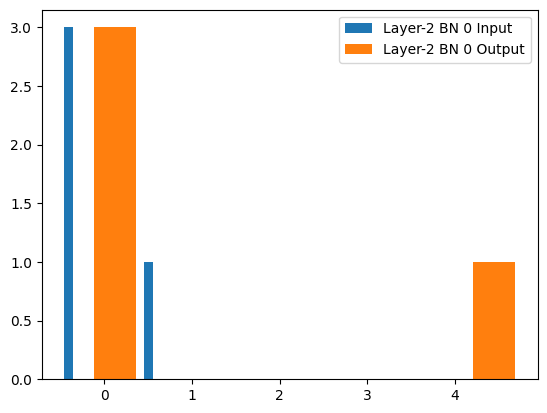

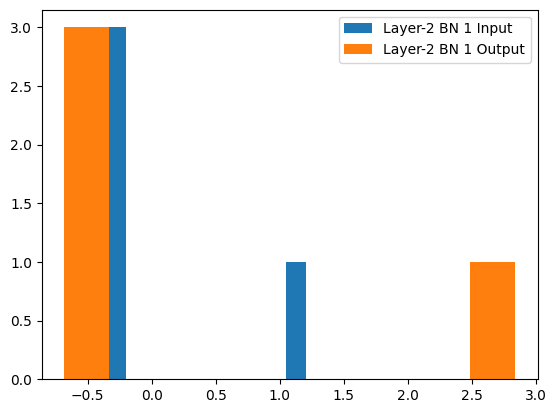

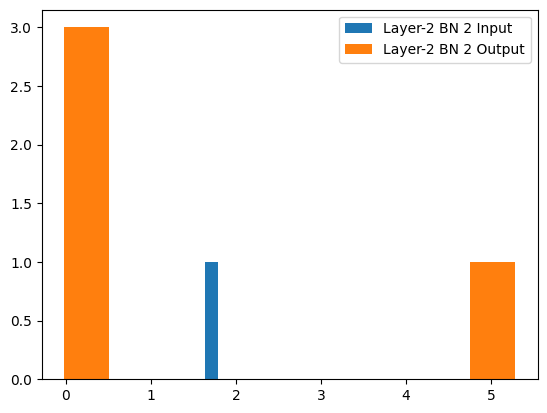

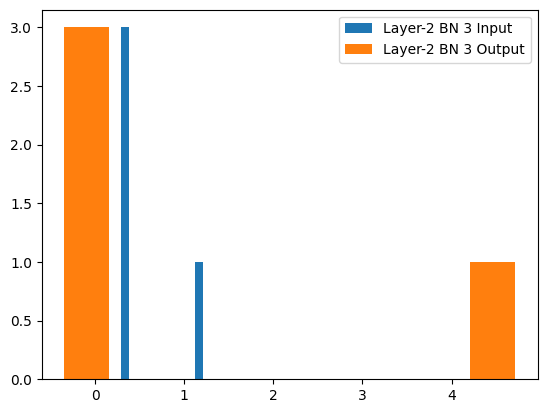

In [3]:
B_out = np.array(model.bn2_output)
B_in = np.array(model.bn2_input)
idx = -1;
for neuron in range(B_in.shape[-1]):
  plt.hist(B_in[idx,:,neuron],label = f'Layer-2 BN {neuron} Input');
  plt.hist(B_out[idx,:,neuron],label = f'Layer-2 BN {neuron} Output');
  plt.legend()
  plt.show()